In [1]:
# Basic python import
import os
import sys
import yaml
import matplotlib.pyplot as plt
import pandas as pd

# Pytorch
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

# Our custom module
sys.path.append('../')
import data_processing
import models
from evaluation import *
import submission

c:\Users\bapti\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Config

Ma proposition : 
Avoir un Notebook template associé à des paramètres par défaut. 
Ensuite pour chaque expérience on le duplique, et on change les valeurs des paramètres que l'on souhaite.

In [2]:
with open('../configs/default_params.yaml') as default_params_file:
      default_params = yaml.safe_load(default_params_file)
params = default_params
params

data_dir = os.path.join('..','data')

DEBUG = False

torch.manual_seed(0)
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')

device

device(type='cuda', index=0)

In [3]:
# Changer de paramètres
params["train"]["batch_size"] = 1
params["train"]

{'script_path': '../train/A_COMPLETER.py',
 'batch_size': 1,
 'epochs': 1000,
 'data_augmentation': {'samplewise_center': False,
  'samplewise_std_normalization': False,
  'rotation_range': 0,
  'width_shift_range': 0.1,
  'height_shift_range': 0.1,
  'horizontal_flip': True,
  'vertical_flip': False,
  'zoom_range': 0,
  'shear_range': 0,
  'channel_shift_range': 0,
  'featurewise_center': False,
  'zca_whitening': False}}

# If necessary, pre-process raw data (to do once on each machine)

In [4]:
from data_processing.preproc import create_masks_as_tiff, preprocess_images_and_masks

# create_masks_as_tiff(data_dir)


# Create Dataset and Dataloader

In [5]:
from data_processing.dataset import CustomDataset, DebugCustomDataset
import torchvision.transforms as transforms

transform = transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((512,512))
])

if DEBUG :
    train_dataset = DebugCustomDataset(root_dir = os.path.join('..','data'), transform=transform)
else : 
    train_dataset = CustomDataset(root_dir = os.path.join('..','data'), transform=transform)

train_dl = DataLoader(train_dataset, batch_size=params["train"]["batch_size"], shuffle=True)

# Train

In [6]:
from models.unet import UNet

MODEL = UNet(num_classes=1)
lr = 1e-3
optimizer = optim.Adam(MODEL.parameters(), lr=lr)
loss = nn.MSELoss()
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [7]:
from train.train import main_train, main_train_batch1

loss_list = main_train_batch1(model=MODEL.to(device), loss_fn=loss, optimizer=optimizer, n_epochs=100, dataset=train_dataset, device=device)

  0%|          | 0/351 [00:00<?, ?it/s]c:\Users\bapti\miniconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1, 512, 512])) that is different to the input size (torch.Size([1, 1, 512, 512])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 351/351 [02:42<00:00,  2.16it/s]


epoch 1/100, train_loss = 7.79e-02, time spent during this epoch = 162.31s, total time spent = 162.31s


100%|██████████| 351/351 [02:21<00:00,  2.47it/s]


epoch 2/100, train_loss = 7.07e-02, time spent during this epoch = 141.99s, total time spent = 304.30s


100%|██████████| 351/351 [02:23<00:00,  2.44it/s]


epoch 3/100, train_loss = 6.83e-02, time spent during this epoch = 143.89s, total time spent = 448.19s


100%|██████████| 351/351 [02:26<00:00,  2.40it/s]


epoch 4/100, train_loss = 6.66e-02, time spent during this epoch = 146.13s, total time spent = 594.32s


100%|██████████| 351/351 [02:24<00:00,  2.42it/s]


epoch 5/100, train_loss = 6.48e-02, time spent during this epoch = 144.77s, total time spent = 739.09s


100%|██████████| 351/351 [02:27<00:00,  2.38it/s]


epoch 6/100, train_loss = 6.30e-02, time spent during this epoch = 147.44s, total time spent = 886.54s


100%|██████████| 351/351 [02:28<00:00,  2.36it/s]


epoch 7/100, train_loss = 6.09e-02, time spent during this epoch = 148.94s, total time spent = 1035.47s


100%|██████████| 351/351 [02:36<00:00,  2.24it/s]


epoch 8/100, train_loss = 5.77e-02, time spent during this epoch = 156.36s, total time spent = 1191.83s


100%|██████████| 351/351 [02:34<00:00,  2.27it/s]


epoch 9/100, train_loss = 5.66e-02, time spent during this epoch = 154.51s, total time spent = 1346.34s


100%|██████████| 351/351 [02:34<00:00,  2.27it/s]


epoch 10/100, train_loss = 5.26e-02, time spent during this epoch = 154.82s, total time spent = 1501.16s


100%|██████████| 351/351 [02:38<00:00,  2.22it/s]


epoch 11/100, train_loss = 5.37e-02, time spent during this epoch = 158.43s, total time spent = 1659.59s


100%|██████████| 351/351 [02:34<00:00,  2.27it/s]


epoch 12/100, train_loss = 4.81e-02, time spent during this epoch = 154.42s, total time spent = 1814.01s


100%|██████████| 351/351 [02:45<00:00,  2.13it/s]


epoch 13/100, train_loss = 4.53e-02, time spent during this epoch = 165.09s, total time spent = 1979.10s


100%|██████████| 351/351 [02:39<00:00,  2.20it/s]


epoch 14/100, train_loss = 4.39e-02, time spent during this epoch = 159.58s, total time spent = 2138.68s


100%|██████████| 351/351 [02:35<00:00,  2.25it/s]


epoch 15/100, train_loss = 4.10e-02, time spent during this epoch = 155.78s, total time spent = 2294.46s


100%|██████████| 351/351 [02:38<00:00,  2.21it/s]


epoch 16/100, train_loss = 3.82e-02, time spent during this epoch = 158.79s, total time spent = 2453.25s


100%|██████████| 351/351 [02:48<00:00,  2.09it/s]


epoch 17/100, train_loss = 3.64e-02, time spent during this epoch = 168.09s, total time spent = 2621.33s


100%|██████████| 351/351 [02:39<00:00,  2.20it/s]


epoch 18/100, train_loss = 3.52e-02, time spent during this epoch = 159.75s, total time spent = 2781.08s


100%|██████████| 351/351 [02:48<00:00,  2.08it/s]


epoch 19/100, train_loss = 3.37e-02, time spent during this epoch = 168.40s, total time spent = 2949.49s


100%|██████████| 351/351 [02:48<00:00,  2.09it/s]


epoch 20/100, train_loss = 3.19e-02, time spent during this epoch = 168.28s, total time spent = 3117.77s


100%|██████████| 351/351 [02:37<00:00,  2.23it/s]


epoch 21/100, train_loss = 3.25e-02, time spent during this epoch = 157.23s, total time spent = 3275.00s


100%|██████████| 351/351 [02:48<00:00,  2.08it/s]


epoch 22/100, train_loss = 3.02e-02, time spent during this epoch = 168.72s, total time spent = 3443.72s


100%|██████████| 351/351 [02:40<00:00,  2.19it/s]


epoch 23/100, train_loss = 2.95e-02, time spent during this epoch = 160.26s, total time spent = 3603.97s


100%|██████████| 351/351 [02:40<00:00,  2.19it/s]


epoch 24/100, train_loss = 3.24e-02, time spent during this epoch = 160.53s, total time spent = 3764.50s


100%|██████████| 351/351 [02:45<00:00,  2.12it/s]


epoch 25/100, train_loss = 2.92e-02, time spent during this epoch = 165.26s, total time spent = 3929.76s


100%|██████████| 351/351 [02:58<00:00,  1.97it/s]


epoch 26/100, train_loss = 2.81e-02, time spent during this epoch = 178.03s, total time spent = 4107.78s


100%|██████████| 351/351 [02:43<00:00,  2.15it/s]


epoch 27/100, train_loss = 2.81e-02, time spent during this epoch = 163.30s, total time spent = 4271.09s


100%|██████████| 351/351 [02:42<00:00,  2.16it/s]


epoch 28/100, train_loss = 2.64e-02, time spent during this epoch = 162.81s, total time spent = 4433.90s


100%|██████████| 351/351 [02:36<00:00,  2.24it/s]


epoch 29/100, train_loss = 3.27e-02, time spent during this epoch = 156.71s, total time spent = 4590.61s


100%|██████████| 351/351 [02:44<00:00,  2.13it/s]


epoch 30/100, train_loss = 2.54e-02, time spent during this epoch = 164.77s, total time spent = 4755.38s


100%|██████████| 351/351 [02:50<00:00,  2.06it/s]


epoch 31/100, train_loss = 2.41e-02, time spent during this epoch = 170.11s, total time spent = 4925.49s


100%|██████████| 351/351 [02:54<00:00,  2.02it/s]


epoch 32/100, train_loss = 2.41e-02, time spent during this epoch = 174.12s, total time spent = 5099.60s


100%|██████████| 351/351 [02:46<00:00,  2.11it/s]


epoch 33/100, train_loss = 2.30e-02, time spent during this epoch = 166.27s, total time spent = 5265.88s


100%|██████████| 351/351 [02:40<00:00,  2.18it/s]


epoch 34/100, train_loss = 2.56e-02, time spent during this epoch = 160.76s, total time spent = 5426.63s


100%|██████████| 351/351 [02:40<00:00,  2.18it/s]


epoch 35/100, train_loss = 2.46e-02, time spent during this epoch = 160.70s, total time spent = 5587.33s


100%|██████████| 351/351 [02:38<00:00,  2.21it/s]


epoch 36/100, train_loss = 2.18e-02, time spent during this epoch = 158.97s, total time spent = 5746.30s


100%|██████████| 351/351 [02:45<00:00,  2.12it/s]


epoch 37/100, train_loss = 1.95e-02, time spent during this epoch = 165.63s, total time spent = 5911.93s


100%|██████████| 351/351 [02:50<00:00,  2.06it/s]


epoch 38/100, train_loss = 2.27e-02, time spent during this epoch = 170.24s, total time spent = 6082.17s


100%|██████████| 351/351 [02:44<00:00,  2.14it/s]


epoch 39/100, train_loss = 2.01e-02, time spent during this epoch = 164.12s, total time spent = 6246.29s


100%|██████████| 351/351 [02:50<00:00,  2.06it/s]


epoch 40/100, train_loss = 1.85e-02, time spent during this epoch = 170.13s, total time spent = 6416.42s


100%|██████████| 351/351 [02:46<00:00,  2.11it/s]


epoch 41/100, train_loss = 1.79e-02, time spent during this epoch = 166.50s, total time spent = 6582.92s


100%|██████████| 351/351 [02:45<00:00,  2.12it/s]


epoch 42/100, train_loss = 2.05e-02, time spent during this epoch = 165.45s, total time spent = 6748.37s


100%|██████████| 351/351 [02:44<00:00,  2.13it/s]


epoch 43/100, train_loss = 1.81e-02, time spent during this epoch = 164.82s, total time spent = 6913.19s


100%|██████████| 351/351 [02:41<00:00,  2.18it/s]


epoch 44/100, train_loss = 2.29e-02, time spent during this epoch = 161.01s, total time spent = 7074.20s


100%|██████████| 351/351 [02:41<00:00,  2.17it/s]


epoch 45/100, train_loss = 1.93e-02, time spent during this epoch = 161.80s, total time spent = 7236.00s


100%|██████████| 351/351 [02:44<00:00,  2.13it/s]


epoch 46/100, train_loss = 1.70e-02, time spent during this epoch = 164.49s, total time spent = 7400.49s


100%|██████████| 351/351 [02:39<00:00,  2.20it/s]


epoch 47/100, train_loss = 1.84e-02, time spent during this epoch = 159.32s, total time spent = 7559.81s


100%|██████████| 351/351 [02:46<00:00,  2.11it/s]


epoch 48/100, train_loss = 1.53e-02, time spent during this epoch = 166.09s, total time spent = 7725.90s


100%|██████████| 351/351 [02:45<00:00,  2.12it/s]


epoch 49/100, train_loss = 1.55e-02, time spent during this epoch = 165.60s, total time spent = 7891.50s


100%|██████████| 351/351 [02:49<00:00,  2.07it/s]


epoch 50/100, train_loss = 1.70e-02, time spent during this epoch = 169.21s, total time spent = 8060.71s


100%|██████████| 351/351 [02:47<00:00,  2.10it/s]


epoch 51/100, train_loss = 1.71e-02, time spent during this epoch = 167.26s, total time spent = 8227.97s


100%|██████████| 351/351 [02:45<00:00,  2.13it/s]


epoch 52/100, train_loss = 1.48e-02, time spent during this epoch = 165.04s, total time spent = 8393.01s


100%|██████████| 351/351 [02:44<00:00,  2.13it/s]


epoch 53/100, train_loss = 1.64e-02, time spent during this epoch = 164.61s, total time spent = 8557.61s


100%|██████████| 351/351 [02:59<00:00,  1.95it/s]


epoch 54/100, train_loss = 2.65e-02, time spent during this epoch = 180.00s, total time spent = 8737.62s


100%|██████████| 351/351 [02:50<00:00,  2.06it/s]


epoch 55/100, train_loss = 1.53e-02, time spent during this epoch = 170.14s, total time spent = 8907.75s


100%|██████████| 351/351 [02:48<00:00,  2.08it/s]


epoch 56/100, train_loss = 1.38e-02, time spent during this epoch = 168.45s, total time spent = 9076.21s


100%|██████████| 351/351 [02:44<00:00,  2.14it/s]


epoch 57/100, train_loss = 1.29e-02, time spent during this epoch = 164.03s, total time spent = 9240.23s


100%|██████████| 351/351 [02:48<00:00,  2.08it/s]


epoch 58/100, train_loss = 1.24e-02, time spent during this epoch = 168.36s, total time spent = 9408.59s


100%|██████████| 351/351 [02:40<00:00,  2.19it/s]


epoch 59/100, train_loss = 1.36e-02, time spent during this epoch = 160.04s, total time spent = 9568.63s


100%|██████████| 351/351 [02:37<00:00,  2.23it/s]


epoch 60/100, train_loss = 2.11e-02, time spent during this epoch = 157.35s, total time spent = 9725.97s


100%|██████████| 351/351 [02:41<00:00,  2.18it/s]


epoch 61/100, train_loss = 1.27e-02, time spent during this epoch = 161.01s, total time spent = 9886.98s


100%|██████████| 351/351 [02:45<00:00,  2.13it/s]


epoch 62/100, train_loss = 1.18e-02, time spent during this epoch = 165.11s, total time spent = 10052.09s


100%|██████████| 351/351 [02:50<00:00,  2.06it/s]


epoch 63/100, train_loss = 1.16e-02, time spent during this epoch = 170.27s, total time spent = 10222.36s


100%|██████████| 351/351 [02:49<00:00,  2.06it/s]


epoch 64/100, train_loss = 1.16e-02, time spent during this epoch = 169.99s, total time spent = 10392.35s


100%|██████████| 351/351 [02:45<00:00,  2.12it/s]


epoch 65/100, train_loss = 1.16e-02, time spent during this epoch = 165.24s, total time spent = 10557.59s


100%|██████████| 351/351 [02:40<00:00,  2.19it/s]


epoch 66/100, train_loss = 1.20e-02, time spent during this epoch = 160.40s, total time spent = 10717.99s


100%|██████████| 351/351 [02:53<00:00,  2.02it/s]


epoch 67/100, train_loss = 1.10e-02, time spent during this epoch = 173.97s, total time spent = 10891.97s


100%|██████████| 351/351 [02:48<00:00,  2.08it/s]


epoch 68/100, train_loss = 1.17e-02, time spent during this epoch = 168.77s, total time spent = 11060.74s


100%|██████████| 351/351 [02:45<00:00,  2.13it/s]


epoch 69/100, train_loss = 1.11e-02, time spent during this epoch = 165.01s, total time spent = 11225.75s


100%|██████████| 351/351 [02:49<00:00,  2.07it/s]


epoch 70/100, train_loss = 1.10e-02, time spent during this epoch = 169.68s, total time spent = 11395.43s


100%|██████████| 351/351 [02:40<00:00,  2.18it/s]


epoch 71/100, train_loss = 1.23e-02, time spent during this epoch = 160.82s, total time spent = 11556.26s


100%|██████████| 351/351 [02:41<00:00,  2.18it/s]


epoch 72/100, train_loss = 1.27e-02, time spent during this epoch = 161.29s, total time spent = 11717.54s


100%|██████████| 351/351 [02:51<00:00,  2.05it/s]


epoch 73/100, train_loss = 1.07e-02, time spent during this epoch = 171.25s, total time spent = 11888.79s


100%|██████████| 351/351 [02:35<00:00,  2.26it/s]


epoch 74/100, train_loss = 1.01e-02, time spent during this epoch = 155.64s, total time spent = 12044.43s


100%|██████████| 351/351 [02:44<00:00,  2.13it/s]


epoch 75/100, train_loss = 1.02e-02, time spent during this epoch = 164.55s, total time spent = 12208.98s


100%|██████████| 351/351 [02:44<00:00,  2.13it/s]


epoch 76/100, train_loss = 1.07e-02, time spent during this epoch = 164.92s, total time spent = 12373.90s


100%|██████████| 351/351 [02:40<00:00,  2.18it/s]


epoch 77/100, train_loss = 9.20e-03, time spent during this epoch = 160.71s, total time spent = 12534.61s


100%|██████████| 351/351 [02:50<00:00,  2.06it/s]


epoch 78/100, train_loss = 8.70e-03, time spent during this epoch = 170.67s, total time spent = 12705.28s


100%|██████████| 351/351 [02:44<00:00,  2.13it/s]


epoch 79/100, train_loss = 1.71e-02, time spent during this epoch = 164.90s, total time spent = 12870.18s


100%|██████████| 351/351 [02:57<00:00,  1.98it/s]


epoch 80/100, train_loss = 1.34e-02, time spent during this epoch = 177.25s, total time spent = 13047.43s


100%|██████████| 351/351 [02:44<00:00,  2.13it/s]


epoch 81/100, train_loss = 9.43e-03, time spent during this epoch = 164.79s, total time spent = 13212.22s


100%|██████████| 351/351 [02:37<00:00,  2.22it/s]


epoch 82/100, train_loss = 8.30e-03, time spent during this epoch = 157.77s, total time spent = 13369.99s


100%|██████████| 351/351 [02:45<00:00,  2.12it/s]


epoch 83/100, train_loss = 8.05e-03, time spent during this epoch = 165.81s, total time spent = 13535.80s


100%|██████████| 351/351 [02:57<00:00,  1.98it/s]


epoch 84/100, train_loss = 7.86e-03, time spent during this epoch = 177.56s, total time spent = 13713.36s


100%|██████████| 351/351 [02:39<00:00,  2.20it/s]


epoch 85/100, train_loss = 7.99e-03, time spent during this epoch = 159.75s, total time spent = 13873.11s


100%|██████████| 351/351 [02:44<00:00,  2.13it/s]


epoch 86/100, train_loss = 8.18e-03, time spent during this epoch = 164.73s, total time spent = 14037.84s


100%|██████████| 351/351 [02:41<00:00,  2.17it/s]


epoch 87/100, train_loss = 8.32e-03, time spent during this epoch = 161.61s, total time spent = 14199.45s


100%|██████████| 351/351 [02:45<00:00,  2.12it/s]


epoch 88/100, train_loss = 8.18e-03, time spent during this epoch = 165.74s, total time spent = 14365.19s


100%|██████████| 351/351 [02:50<00:00,  2.06it/s]


epoch 89/100, train_loss = 8.13e-03, time spent during this epoch = 170.35s, total time spent = 14535.54s


100%|██████████| 351/351 [02:41<00:00,  2.17it/s]


epoch 90/100, train_loss = 7.77e-03, time spent during this epoch = 161.63s, total time spent = 14697.17s


100%|██████████| 351/351 [02:41<00:00,  2.18it/s]


epoch 91/100, train_loss = 8.04e-03, time spent during this epoch = 161.02s, total time spent = 14858.18s


100%|██████████| 351/351 [02:45<00:00,  2.13it/s]


epoch 92/100, train_loss = 1.70e-02, time spent during this epoch = 165.07s, total time spent = 15023.25s


100%|██████████| 351/351 [02:41<00:00,  2.17it/s]


epoch 93/100, train_loss = 9.42e-03, time spent during this epoch = 161.73s, total time spent = 15184.98s


100%|██████████| 351/351 [02:43<00:00,  2.14it/s]


epoch 94/100, train_loss = 7.31e-03, time spent during this epoch = 163.75s, total time spent = 15348.74s


100%|██████████| 351/351 [02:36<00:00,  2.25it/s]


epoch 95/100, train_loss = 6.64e-03, time spent during this epoch = 156.21s, total time spent = 15504.95s


100%|██████████| 351/351 [02:45<00:00,  2.12it/s]


epoch 96/100, train_loss = 6.40e-03, time spent during this epoch = 165.42s, total time spent = 15670.37s


100%|██████████| 351/351 [02:49<00:00,  2.08it/s]


epoch 97/100, train_loss = 6.68e-03, time spent during this epoch = 169.02s, total time spent = 15839.38s


100%|██████████| 351/351 [02:37<00:00,  2.23it/s]


epoch 98/100, train_loss = 7.02e-03, time spent during this epoch = 157.16s, total time spent = 15996.54s


100%|██████████| 351/351 [02:42<00:00,  2.15it/s]


epoch 99/100, train_loss = 7.11e-03, time spent during this epoch = 162.97s, total time spent = 16159.52s


100%|██████████| 351/351 [02:45<00:00,  2.13it/s]

epoch 100/100, train_loss = 7.21e-03, time spent during this epoch = 165.15s, total time spent = 16324.66s


In [8]:
import numpy as np

def show_image_and_mask(image,mask,cmaps):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 32))
    hybr = image[0, :, :]/2 + mask[0, :, :]

    ax[0].imshow(image.T)
    ax[0].axis('off')
    ax[0].set_title('IMAGE')
    ax[1].imshow(hybr.T,cmap=cmaps)
    ax[1].axis('off')
    ax[1].set_title('MASK ON IMAGE')
    plt.show()

image = train_dataset[0][0]
mask = train_dataset[0][2]

print(image.shape)
print(mask.shape)

#show_image_and_mask(image,mask,"gray")
#show_image_and_mask(image,MODEL(torch.unsqueeze(image, dim=0).to(device)).cpu().detach(),"gray")

torch.Size([3, 512, 512])
torch.Size([1, 512, 512])


### Save Model

In [9]:
import time
torch.save(MODEL, f"../model_save/save_{time.gmtime(time.time())}")

# Evaluation

Running model on validation dataset

In [10]:
import gc
gc.collect()

0

In [11]:
# val_pred = {"val_images":[], "val_masks":[], "val_organs":[], "val_y_preds":[]}
# for k, (val_image, val_organ, val_mask) in enumerate(train_dl):
#     print(k)
#     val_pred['val_images'].append(val_image)
#     val_pred['val_masks'].append(val_mask)
#     val_pred['val_organs'].append(val_organ)
    
#     gc.collect()
#     print(torch.cuda.memory_allocated(0),
#         torch.cuda.memory_reserved(0),
#         torch.cuda.max_memory_reserved(0),)
#     pred = MODEL(val_image.to(device))
#     val_pred['val_y_preds'].append(pred.cpu)

In [12]:
#Validation images, masks and organs
val_preds = {0:{"val_images":[], "val_masks":[], "val_organs":[], "val_y_preds":[]}} #Only 1 fold

for l, batch in enumerate(train_dl):
    (val_images, val_organs, val_masks) = next(iter(train_dl))
    val_mask_preds = MODEL(val_images.to(device)).cpu().detach()
    print(f'VAL_Y_PREDS shape: {val_mask_preds.shape}, VAL_Y_PREDS dtype: {val_mask_preds.dtype}')
    print(f'val_images shape: {val_images.shape}, val_masks shape: {val_masks.shape}, val_organs shape: {len(val_organs)}')
    for k in range(len(val_images)):
        # Cast from Tensorflow to Numpy
        val_preds[0]['val_images'].append(val_images[k].numpy())
        val_preds[0]['val_masks'].append(val_masks[k].numpy().astype(np.uint8))
        val_preds[0]['val_organs'].append(val_organs[k])
        val_preds[0]['val_y_preds'].append(val_mask_preds[k].numpy())

VAL_Y_PREDS shape: torch.Size([1, 1, 512, 512]), VAL_Y_PREDS dtype: torch.float32
val_images shape: torch.Size([1, 3, 512, 512]), val_masks shape: torch.Size([1, 1, 512, 512]), val_organs shape: 1
VAL_Y_PREDS shape: torch.Size([1, 1, 512, 512]), VAL_Y_PREDS dtype: torch.float32
val_images shape: torch.Size([1, 3, 512, 512]), val_masks shape: torch.Size([1, 1, 512, 512]), val_organs shape: 1
VAL_Y_PREDS shape: torch.Size([1, 1, 512, 512]), VAL_Y_PREDS dtype: torch.float32
val_images shape: torch.Size([1, 3, 512, 512]), val_masks shape: torch.Size([1, 1, 512, 512]), val_organs shape: 1
VAL_Y_PREDS shape: torch.Size([1, 1, 512, 512]), VAL_Y_PREDS dtype: torch.float32
val_images shape: torch.Size([1, 3, 512, 512]), val_masks shape: torch.Size([1, 1, 512, 512]), val_organs shape: 1
VAL_Y_PREDS shape: torch.Size([1, 1, 512, 512]), VAL_Y_PREDS dtype: torch.float32
val_images shape: torch.Size([1, 3, 512, 512]), val_masks shape: torch.Size([1, 1, 512, 512]), val_organs shape: 1
VAL_Y_PREDS sha

In [13]:
gc.collect()
print(torch.cuda.memory_allocated(0),
      torch.cuda.memory_reserved(0),
    torch.cuda.max_memory_reserved(0),)

132111360 1560281088 1560281088


In [14]:
from evaluation.evaluation import get_y_true_y_pred

IoU_Folds = dict()
for fold, v in val_preds.items():
    IoUs, IoUsOrgans = get_y_true_y_pred(v)
    IoU_Folds[fold] = {
        'IoUs': IoUs,
        'IoUsOrgans': IoUsOrgans,
    }

<class 'tqdm.std.tqdm'>


  0%|          | 0/351 [00:00<?, ?it/s]

image shape: (3, 512, 512), y_true shape: (1, 512, 512)
organs: kidney, y_pred shape: (1, 512, 512)


100%|██████████| 351/351 [01:46<00:00,  3.30it/s]


FOLD 0


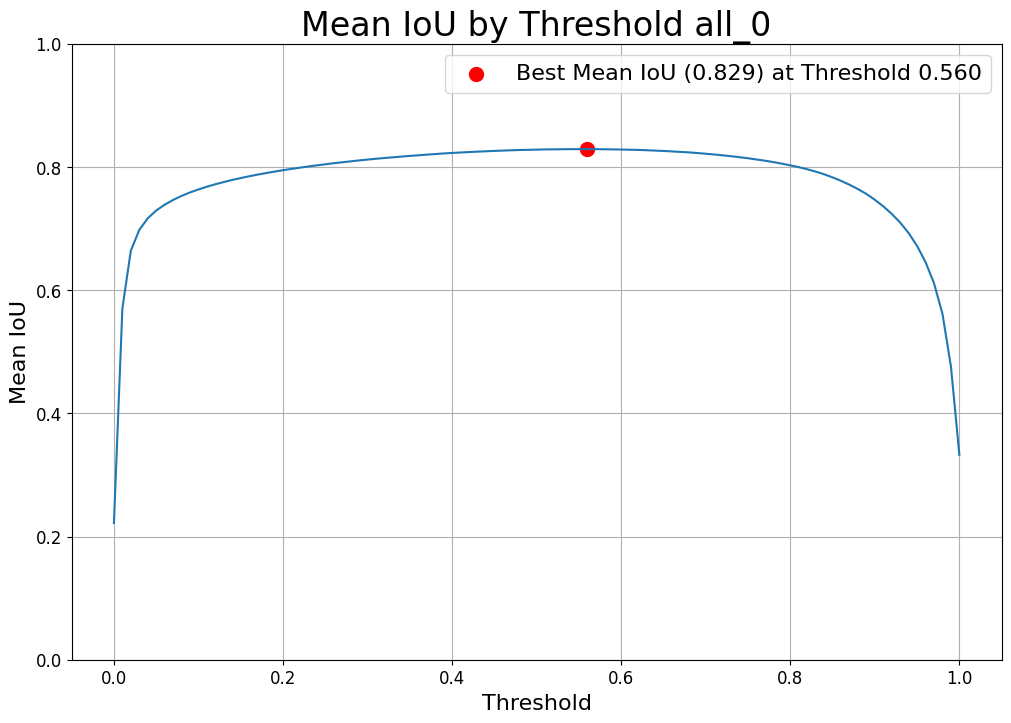

In [15]:
from evaluation.evaluation import plot_iou_by_threshold

# Global Mean Intersection over Union at Threshold
for fold, v in IoU_Folds.items():
    print('=' * 80)
    print(f'FOLD {fold}')
    print('=' * 80)
    v['threshold_best'] = plot_iou_by_threshold(v['IoUs'], f'all_{fold}')

In [16]:
for fold, v in IoU_Folds.items():
    print('=' * 80)
    print(f'FOLD {fold}')
    print('=' * 80)
    
    percentiles = [0.01, 0.05, 0.10, 0.25, 0.40, 0.50, 0.60, 0.75, 0.90, 0.95, 0.99]
    s = v['IoUs'][v['threshold_best']]
    
    display(pd.Series(s).describe(percentiles=percentiles).apply(lambda v: f'{v:.2f}').to_frame(name='Value').T)

FOLD 0


,count,mean,std,min,1%,5%,10%,25%,40%,50%,60%,75%,90%,95%,99%,max
Value,351.00,0.83,0.17,0.00,0.00,0.39,0.64,0.83,0.87,0.89,0.90,0.92,0.93,0.94,0.95,0.96


FOLD 0


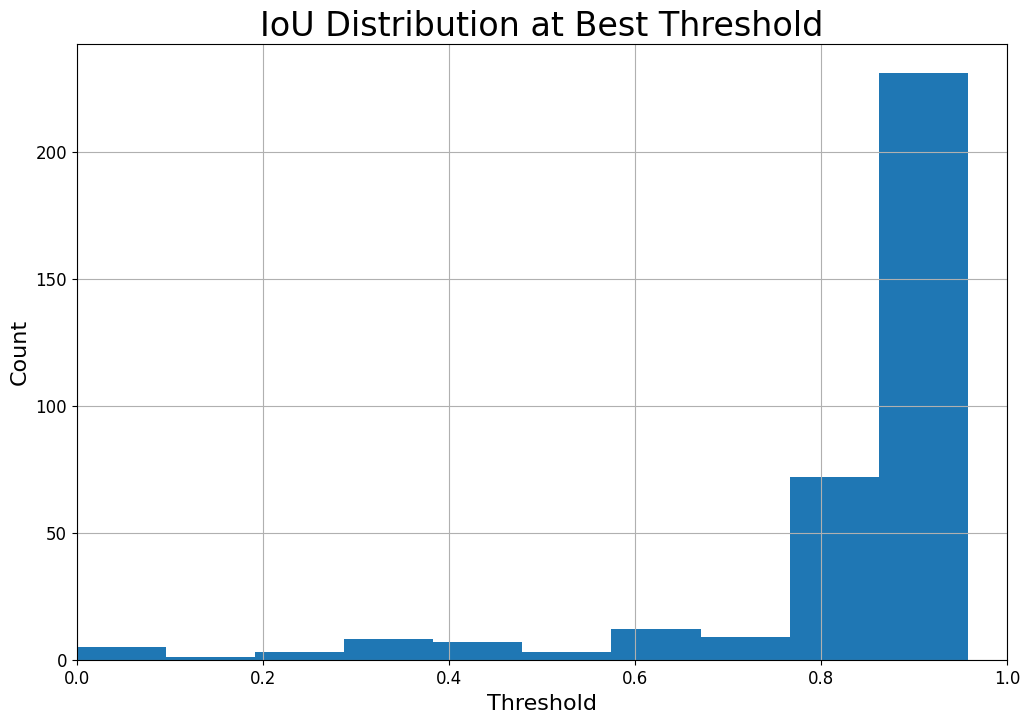

In [17]:
for fold, v in IoU_Folds.items():
    print('=' * 80)
    print(f'FOLD {fold}')
    print('=' * 80)
    plt.figure(figsize=(12,8))
    pd.Series(v['IoUs'][v['threshold_best']]).plot(kind='hist')
    plt.title('IoU Distribution at Best Threshold', size=24)
    plt.grid()
    plt.xlabel('Threshold', size=16)
    plt.ylabel('Count', size=16)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.xlim(0,1)
    plt.show()

We can also look at some of the results

FOLD 0


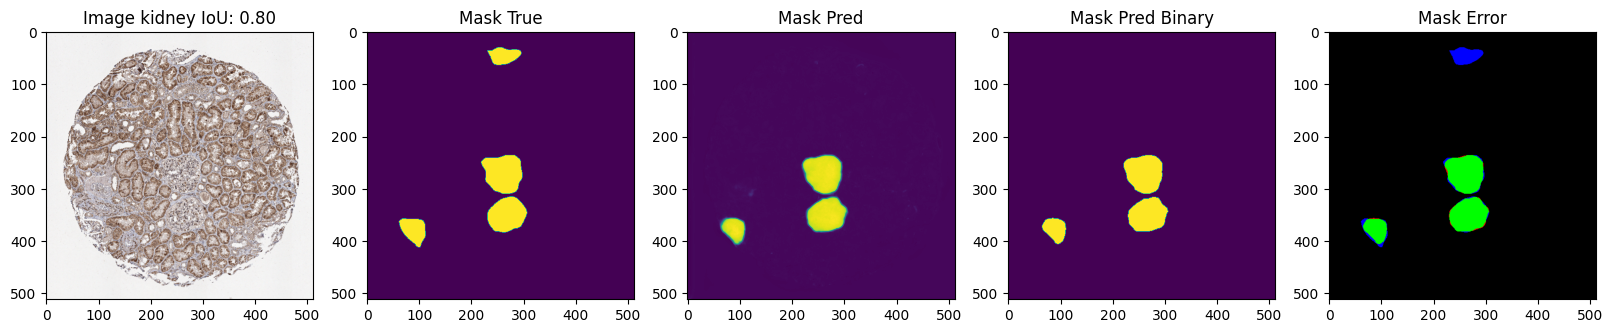

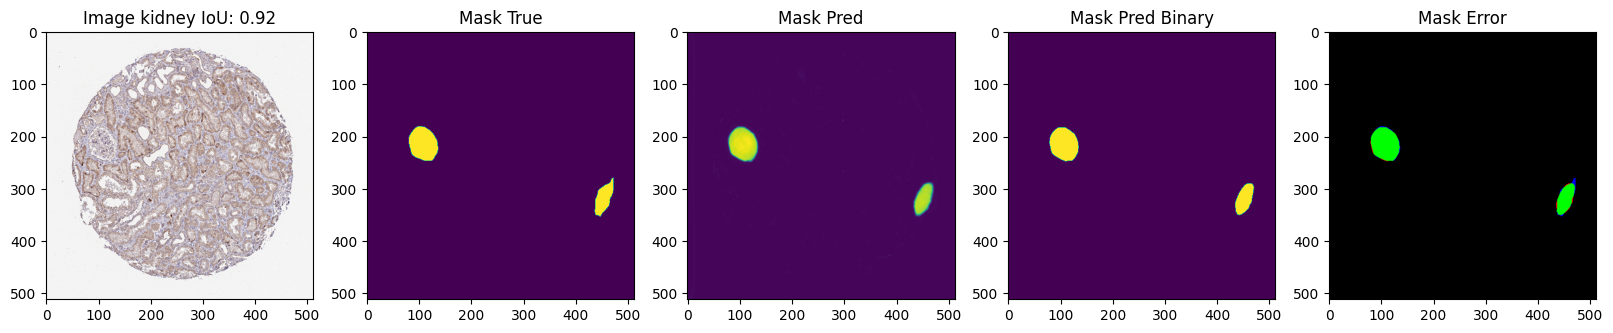

In [18]:
from evaluation.evaluation import plot_validation_predictions

for fold, v in IoU_Folds.items():
    print('=' * 80)
    print(f'FOLD {fold}')
    print('=' * 80)
    threshold_best = IoU_Folds[fold]['threshold_best']
    plot_validation_predictions(val_preds[fold], threshold_best, 2, IoUs)

# Submission

In [19]:
from submission import submission

test_dataset = None # TO BUILD
submission.make_submission(MODEL, test_dataset, best_threshold)

NameError: name 'Ima' is not defined